<a href="https://colab.research.google.com/github/Akshith040/Amazon-Ml-Challenge/blob/main/amazonml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas numpy matplotlib seaborn Pillow torch torchvision tqdm easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 24.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision
from PIL import Image
import requests
from io import BytesIO
import easyocr
from tqdm import tqdm

In [ ]:
# Adjust the path as needed
train_df = pd.read_csv('/content/drive/MyDrive/amazon ml/66e31d6ee96cd_student_resource_3/student_resource 3/dataset/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/amazon ml/66e31d6ee96cd_student_resource_3/student_resource 3/dataset/test.csv')

print("Train dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)

print("\nTrain dataset columns:", train_df.columns)
print("Test dataset columns:", test_df.columns)

print("\nSample of train data:")
print(train_df.head())

print("\nUnique group_ids:", train_df['group_id'].nunique())
print("Unique entity_names:", train_df['entity_name'].nunique())

Train dataset shape: (263859, 4)
Test dataset shape: (131187, 4)

Train dataset columns: Index(['image_link', 'group_id', 'entity_name', 'entity_value'], dtype='object')
Test dataset columns: Index(['index', 'image_link', 'group_id', 'entity_name'], dtype='object')

Sample of train data:
                                          image_link  group_id  entity_name  \
0  https://m.media-amazon.com/images/I/61I9XdN6OF...    748919  item_weight   
1  https://m.media-amazon.com/images/I/71gSRbyXmo...    916768  item_volume   
2  https://m.media-amazon.com/images/I/61BZ4zrjZX...    459516  item_weight   
3  https://m.media-amazon.com/images/I/612mrlqiI4...    459516  item_weight   
4  https://m.media-amazon.com/images/I/617Tl40LOX...    731432  item_weight   

     entity_value  
0      500.0 gram  
1         1.0 cup  
2      0.709 gram  
3      0.709 gram  
4  1400 milligram  

Unique group_ids: 750
Unique entity_names: 8


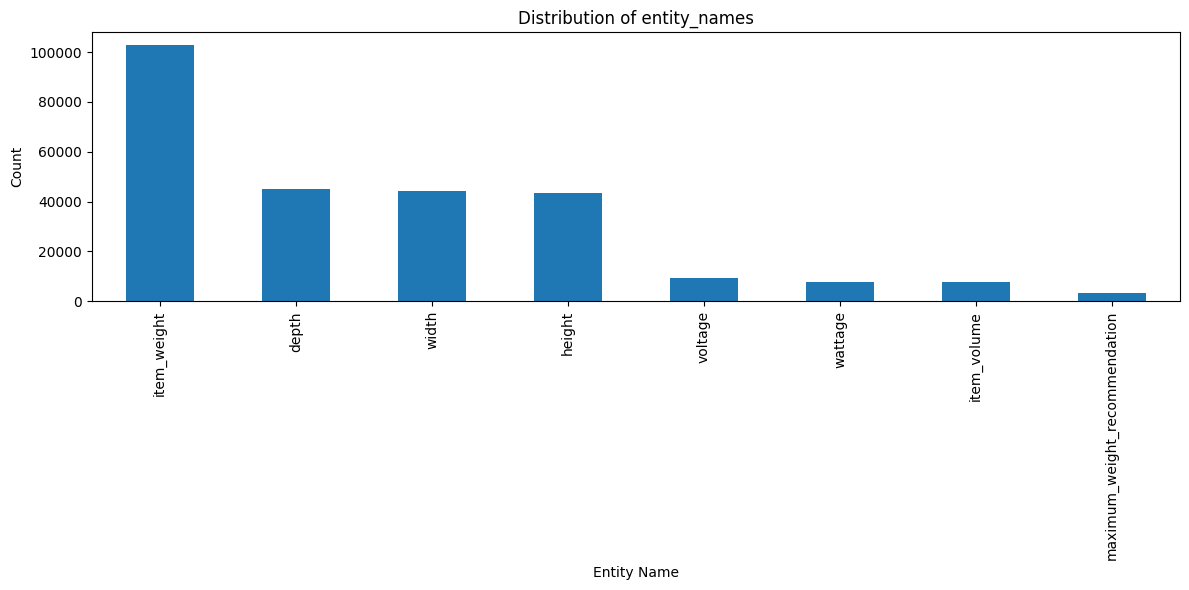

In [ ]:
plt.figure(figsize=(12, 6))
train_df['entity_name'].value_counts().plot(kind='bar')
plt.title('Distribution of entity_names')
plt.xlabel('Entity Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

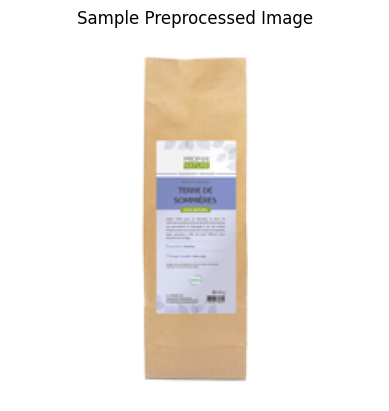

In [ ]:
def download_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

def preprocess_image(img, target_size=(224, 224)):
    img = img.convert('RGB')
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0  # Normalize to [0, 1]
    return img_array

# Download and preprocess a sample image
sample_url = train_df['image_link'].iloc[0]
sample_img = download_image(sample_url)
processed_img = preprocess_image(sample_img)

plt.imshow(processed_img)
plt.axis('off')
plt.title('Sample Preprocessed Image')
plt.show()

In [ ]:
reader = easyocr.Reader(['en'])

def perform_ocr(img):
    result = reader.readtext(np.array(img))
    return ' '.join([text for _, text, _ in result])

# Perform OCR on the sample image
ocr_text = perform_ocr(sample_img)
print("Extracted text:", ocr_text)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

Extracted text: PROPOS' NATUREJ INGREDIENT MENAGER MULTI-USAGE TERRE dE SOMMIERES 400% NATUREL Argile 10036 pure et   naturelle Lerre Sommierespreserte des proprietes absorbantes qui permettent nelloyage sec des laches recalcitrantes Sur toutes les surfaces (moquette; tapis; parquel_- Elle est aussi efficace desodoriser linge: Ingredient Bentonite Dosage conseille Sclon usage. S[0an Lunponpacel cetl{ I 0t inunei4 Wzouul Rtiu fos; Lnfonr 00% @500 g Jusuac LABORATOIRE RROPOSNATURE UCUGRLDEC . [uacoJi JHH4E 04 e+raaly 'Mp"0pr-nJinecon 780 103 pour 'Pnz


In [ ]:
def extract_features(img_url, entity_name, group_id):
    # Download and preprocess image
    img = download_image(img_url)
    img_array = preprocess_image(img)

    # Perform OCR
    ocr_text = perform_ocr(img)

    # Use a pre-trained model for image feature extraction
    model = torchvision.models.resnet18(pretrained=True)
    feature_extractor = torch.nn.Sequential(*list(model.children())[:-1])
    feature_extractor.eval()

    with torch.no_grad():
        img_tensor = torch.FloatTensor(img_array).permute(2, 0, 1).unsqueeze(0)
        features = feature_extractor(img_tensor).squeeze().numpy()

    # Combine features
    combined_features = np.concatenate([
        features,
        [hash(entity_name) % 100],  # Simple encoding for entity_name
        [hash(group_id) % 100],     # Simple encoding for group_id
        [len(ocr_text)]             # Length of extracted text as a feature
    ])

    return combined_features, ocr_text

# Extract features for a sample image
sample_features, sample_ocr = extract_features(
    train_df['image_link'].iloc[0],
    train_df['entity_name'].iloc[0],
    train_df['group_id'].iloc[0]
)

print("Feature vector shape:", sample_features.shape)
print("OCR text:", sample_ocr)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 120MB/s]


Feature vector shape: (515,)
OCR text: PROPOS' NATUREJ INGREDIENT MENAGER MULTI-USAGE TERRE dE SOMMIERES 400% NATUREL Argile 10036 pure et   naturelle Lerre Sommierespreserte des proprietes absorbantes qui permettent nelloyage sec des laches recalcitrantes Sur toutes les surfaces (moquette; tapis; parquel_- Elle est aussi efficace desodoriser linge: Ingredient Bentonite Dosage conseille Sclon usage. S[0an Lunponpacel cetl{ I 0t inunei4 Wzouul Rtiu fos; Lnfonr 00% @500 g Jusuac LABORATOIRE RROPOSNATURE UCUGRLDEC . [uacoJi JHH4E 04 e+raaly 'Mp"0pr-nJinecon 780 103 pour 'Pnz


In [ ]:
import re

def clean_entity_value(value):
    # Remove any brackets or non-numeric characters
    value = re.sub(r'[^\d.-]', '', value)

    # Handle ranges, e.g., "2-3" -> "2.5" (average of range)
    if '-' in value:
        values = list(map(float, value.split('-')))
        value = str(sum(values) / len(values))

    return value

def prepare_data(df, num_samples=1000):
    features_list = []
    labels = []

    for _, row in tqdm(df.sample(num_samples).iterrows(), total=num_samples):
        features, _ = extract_features(row['image_link'], row['entity_name'], row['group_id'])
        features_list.append(features)

        # Clean and extract numeric value and unit
        try:
            value, unit = row['entity_value'].split(' ', 1)
            value = clean_entity_value(value)  # Clean the value
            labels.append(float(value))
        except (ValueError, AttributeError) as e:
            print(f"Error processing row {row['entity_value']}: {e}")
            continue

    return np.array(features_list), np.array(labels)

# Prepare a subset of the data
X, y = prepare_data(train_df, num_samples=1000)

print("Features shape:", X.shape)
print("Labels shape:", y.shape)


100%|██████████| 1000/1000 [17:32<00:00,  1.05s/it]

Features shape: (1000, 515)
Labels shape: (1000,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (800, 515)
Validation set shape: (200, 515)


In [ ]:
import torch.nn as nn
import torch.optim as optim

class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNN(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print(model)

SimpleNN(
  (fc1): Linear(in_features=515, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
)


Epoch [10/50], Train Loss: 1462411.5000, Val Loss: 1607196.5000
Epoch [20/50], Train Loss: 4558793.0000, Val Loss: 4882253.0000
Epoch [30/50], Train Loss: 7042480.0000, Val Loss: 6716919.0000
Epoch [40/50], Train Loss: 9881340.0000, Val Loss: 7445457.5000
Epoch [50/50], Train Loss: 16432916.0000, Val Loss: 10756564.0000


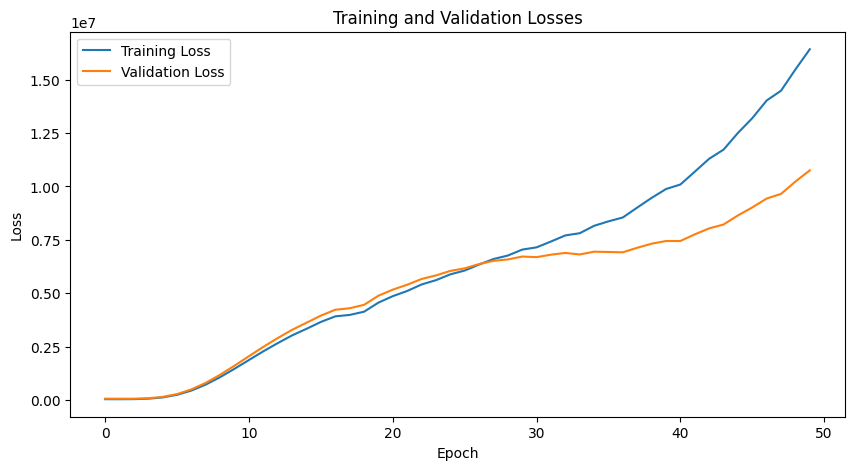

In [ ]:
def train_model(model, X_train, y_train, X_val, y_val, epochs=50, batch_size=32):
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        for i in range(0, len(X_train), batch_size):
            batch_X = torch.FloatTensor(X_train[i:i+batch_size])
            batch_y = torch.FloatTensor(y_train[i:i+batch_size]).unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

        # Evaluate on validation set
        model.eval()
        with torch.no_grad():
            val_outputs = model(torch.FloatTensor(X_val))
            val_loss = criterion(val_outputs, torch.FloatTensor(y_val).unsqueeze(1))

        train_losses.append(loss.item())
        val_losses.append(val_loss.item())

        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

    return train_losses, val_losses

train_losses, val_losses = train_model(model, X_train, y_train, X_val, y_val)

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Mean Squared Error: 10756563.9421
Mean Absolute Error: 1577.7265


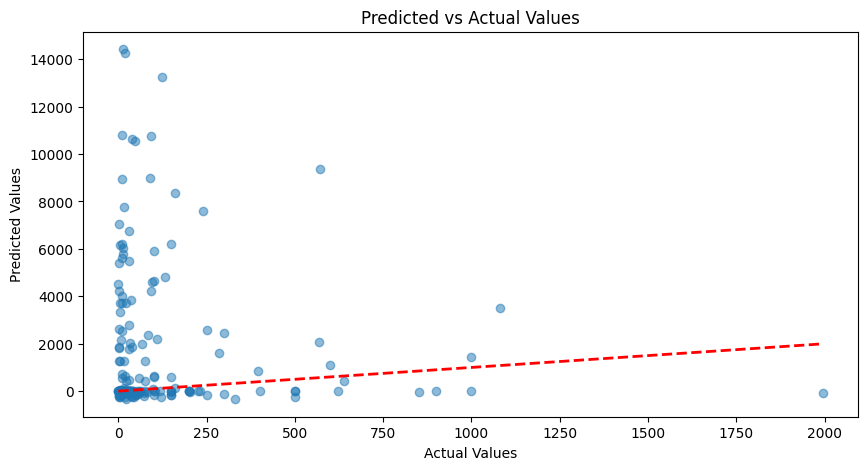

In [ ]:
def evaluate_model(model, X, y):
    model.eval()
    with torch.no_grad():
        predictions = model(torch.FloatTensor(X)).numpy().flatten()

    mse = np.mean((predictions - y) ** 2)
    mae = np.mean(np.abs(predictions - y))

    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")

    # Plot predicted vs actual values
    plt.figure(figsize=(10, 5))
    plt.scatter(y, predictions, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted vs Actual Values')
    plt.show()

evaluate_model(model, X_val, y_val)

In [ ]:
def generate_predictions(model, test_df, num_samples=None):
    if num_samples:
        test_df = test_df.sample(num_samples)

    predictions = []

    for _, row in tqdm(test_df.iterrows(), total=len(test_df)):
        features, ocr_text = extract_features(row['image_link'], row['entity_name'], row['group_id'])

        with torch.no_grad():
            pred_value = model(torch.FloatTensor(features).unsqueeze(0)).item()

        # TODO: Implement logic to determine the appropriate unit based on entity_name and OCR text
        # For now, we'll use a placeholder unit
        unit = "unit"

        predictions.append({
            'index': row['index'],
            'prediction': f"{pred_value:.2f} {unit}"
        })

    return pd.DataFrame(predictions)

# Generate predictions for a small subset of the test data
test_predictions = generate_predictions(model, test_df, num_samples=100)
print(test_predictions.head())

  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 100/100 [01:25<00:00,  1.16it/s]

   index     prediction
0   5890  12899.41 unit
1  49819     -8.23 unit
2   5943     -5.47 unit
3  30364     -6.03 unit
4  82755     -7.71 unit


In [ ]:
import torchvision.transforms as transforms
from torchvision.models import resnet50, ResNet50_Weights

# Define image transformations
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load pre-trained ResNet50 model
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
feature_extractor = torch.nn.Sequential(*list(model.children())[:-1])
feature_extractor.eval()

def extract_image_features(img_url):
    # Download image
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content)).convert('RGB')

    # Preprocess image
    img_tensor = preprocess(img)

    # Extract features
    with torch.no_grad():
        features = feature_extractor(img_tensor.unsqueeze(0))

    return features.squeeze().numpy()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 142MB/s]


In [ ]:
import re

def process_ocr_text(ocr_text, entity_name):
    # Convert to lowercase for easier processing
    ocr_text = ocr_text.lower()

    # Define regex patterns for different entity types
    patterns = {
        'item_weight': r'(\d+(?:\.\d+)?)\s*(g|gram|kg|kilogram|oz|ounce|lb|pound)',
        'item_length': r'(\d+(?:\.\d+)?)\s*(mm|millimeter|cm|centimeter|m|meter|in|inch|ft|foot)',
        # Add more patterns for other entity types
    }

    # Use the appropriate regex pattern based on the entity_name
    pattern = patterns.get(entity_name, r'(\d+(?:\.\d+)?)\s*(\w+)')

    # Find all matches in the OCR text
    matches = re.findall(pattern, ocr_text)

    if matches:
        # Return the first match (value and unit)
        return float(matches[0][0]), matches[0][1]
    else:
        # If no match found, return None
        return None, None

# Test the OCR processing
sample_ocr_text = "Product weight: 500 grams, dimensions: 10 cm x 5 cm x 2 cm"
value, unit = process_ocr_text(sample_ocr_text, 'item_weight')
print(f"Extracted value: {value}, unit: {unit}")

Extracted value: 500.0, unit: g


In [ ]:
def extract_features(img_url, entity_name, group_id):
    # Extract image features
    img_features = extract_image_features(img_url)

    # Perform OCR
    img = Image.open(BytesIO(requests.get(img_url).content))
    ocr_text = perform_ocr(img)

    # Process OCR text
    ocr_value, ocr_unit = process_ocr_text(ocr_text, entity_name)

    # Encode categorical features
    entity_encoding = hash(entity_name) % 100
    group_encoding = hash(group_id) % 100

    # Combine all features
    combined_features = np.concatenate([
        img_features,
        [entity_encoding, group_encoding],
        [ocr_value if ocr_value is not None else 0],
        [hash(ocr_unit) % 100 if ocr_unit is not None else 0]
    ])

    return combined_features, ocr_text, ocr_value, ocr_unit

# Test the updated feature extraction
sample_url = train_df['image_link'].iloc[0]
sample_entity = train_df['entity_name'].iloc[0]
sample_group = train_df['group_id'].iloc[0]

features, ocr_text, ocr_value, ocr_unit = extract_features(sample_url, sample_entity, sample_group)
print(f"Feature vector shape: {features.shape}")
print(f"OCR text: {ocr_text}")
print(f"Extracted value: {ocr_value}, unit: {ocr_unit}")

Feature vector shape: (2052,)
OCR text: PROPOS' NATUREJ INGREDIENT MENAGER MULTI-USAGE TERRE dE SOMMIERES 400% NATUREL Argile 10036 pure et   naturelle Lerre Sommierespreserte des proprietes absorbantes qui permettent nelloyage sec des laches recalcitrantes Sur toutes les surfaces (moquette; tapis; parquel_- Elle est aussi efficace desodoriser linge: Ingredient Bentonite Dosage conseille Sclon usage. S[0an Lunponpacel cetl{ I 0t inunei4 Wzouul Rtiu fos; Lnfonr 00% @500 g Jusuac LABORATOIRE RROPOSNATURE UCUGRLDEC . [uacoJi JHH4E 04 e+raaly 'Mp"0pr-nJinecon 780 103 pour 'Pnz
Extracted value: 500.0, unit: g


In [ ]:
def prepare_data(df, num_samples=1000):
    features_list = []
    labels = []

    for _, row in tqdm(df.sample(num_samples).iterrows(), total=num_samples):
        features, _, _, _ = extract_features(row['image_link'], row['entity_name'], row['group_id'])
        features_list.append(features)

        # Extract numeric value and unit
        entity_value = row['entity_value']
        try:
            value = entity_value.split(' ', 1)[0]
            # Remove any non-numeric characters (except '.')
            value = ''.join(c for c in value if c.isdigit() or c == '.')
            labels.append(float(value))
        except (ValueError, IndexError) as e:
            print(f"Error processing entity_value: {entity_value}")
            print(f"Row data: {row}")
            print(f"Error: {str(e)}")
            # Append a placeholder value (you might want to handle this differently)
            labels.append(0.0)

    return np.array(features_list), np.array(labels)

# Prepare a subset of the data with the new feature extraction
X, y = prepare_data(train_df, num_samples=1000)

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

100%|██████████| 1000/1000 [17:34<00:00,  1.05s/it]

Features shape: (1000, 2052)
Labels shape: (1000,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (800, 2052)
Validation set shape: (200, 2052)


In [ ]:
import torch.nn as nn
import torch.optim as optim

class ImprovedNN(nn.Module):
    def __init__(self, input_size):
        super(ImprovedNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = ImprovedNN(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print(model)

ImprovedNN(
  (fc1): Linear(in_features=2052, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
)


Epoch [10/100], Train Loss: 499995613229.5090, Val Loss: 2568139.7500
Epoch [20/100], Train Loss: 499058957058.8300, Val Loss: 14065267.0000
Epoch [30/100], Train Loss: 490729494849.7600, Val Loss: 358234112.0000
Epoch [40/100], Train Loss: 464429925018.2794, Val Loss: 1287185024.0000
Epoch [50/100], Train Loss: 409563999988.1369, Val Loss: 1681405056.0000
Epoch [60/100], Train Loss: 323447356265.3212, Val Loss: 1348819328.0000
Epoch [70/100], Train Loss: 222660302692.2900, Val Loss: 764566272.0000
Epoch [80/100], Train Loss: 100439079012.9162, Val Loss: 537207744.0000
Epoch [90/100], Train Loss: 20084944320.2400, Val Loss: 100464392.0000
Epoch [100/100], Train Loss: 17117077854.9825, Val Loss: 7164893.5000


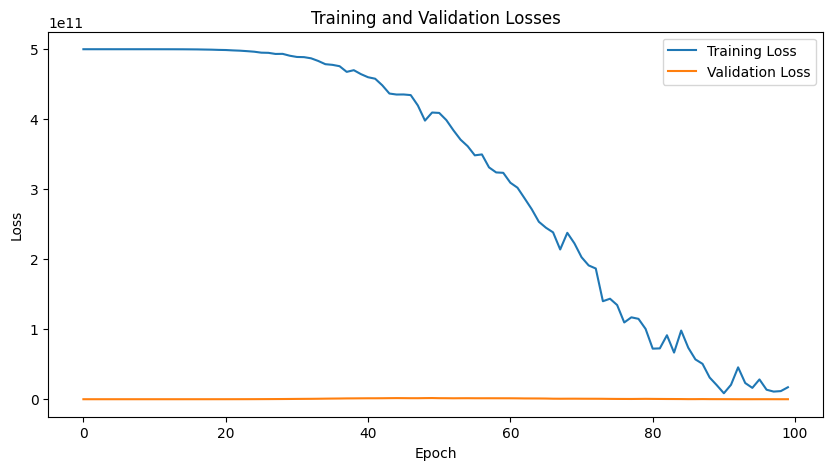

In [ ]:
def train_model(model, X_train, y_train, X_val, y_val, epochs=100, batch_size=32):
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for i in range(0, len(X_train), batch_size):
            batch_X = torch.FloatTensor(X_train[i:i+batch_size])
            batch_y = torch.FloatTensor(y_train[i:i+batch_size]).unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        # Evaluate on validation set
        model.eval()
        with torch.no_grad():
            val_outputs = model(torch.FloatTensor(X_val))
            val_loss = criterion(val_outputs, torch.FloatTensor(y_val).unsqueeze(1))

        train_losses.append(epoch_loss / (len(X_train) // batch_size))
        val_losses.append(val_loss.item())

        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

    return train_losses, val_losses

train_losses, val_losses = train_model(model, X_train, y_train, X_val, y_val)

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Mean Squared Error: 7164894.2369
Mean Absolute Error: 1314.4446


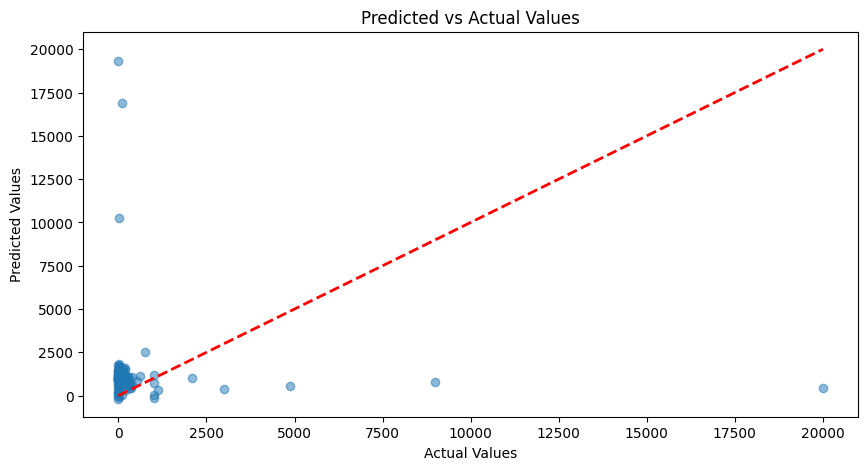

In [ ]:
def evaluate_model(model, X, y):
    model.eval()
    with torch.no_grad():
        predictions = model(torch.FloatTensor(X)).numpy().flatten()

    mse = np.mean((predictions - y) ** 2)
    mae = np.mean(np.abs(predictions - y))

    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")

    # Plot predicted vs actual values
    plt.figure(figsize=(10, 5))
    plt.scatter(y, predictions, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted vs Actual Values')
    plt.show()

evaluate_model(model, X_val, y_val)

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/amazon ml/66e31d6ee96cd_student_resource_3/student_resource 3/src/constants.py')
import constants
from constants import entity_unit_map, allowed_units

def generate_predictions(model, test_df, num_samples=None):
    if num_samples:
        test_df = test_df.sample(num_samples)

    predictions = []

    for _, row in tqdm(test_df.iterrows(), total=len(test_df)):
        features, _, ocr_value, ocr_unit = extract_features(row['image_link'], row['entity_name'], row['group_id'])

        with torch.no_grad():
            pred_value = model(torch.FloatTensor(features).unsqueeze(0)).item()

        entity_name = row['entity_name']

        # Use OCR unit if it's in the allowed units, otherwise use the first unit from entity_unit_map
        if ocr_unit in entity_unit_map.get(entity_name, set()):
            unit = ocr_unit
        else:
            unit = next(iter(entity_unit_map.get(entity_name, {"unit"})))

        # Format the prediction according to the required output format
        formatted_prediction = f"{pred_value:.2f} {unit}"

        predictions.append({
            'index': row['index'],
            'prediction': formatted_prediction
        })

    return pd.DataFrame(predictions)

ModuleNotFoundError: No module named 'constants'

In [ ]:
# Save the entire model
torch.save(model, "entire_model.pth")
print("Entire model saved.")


In [ ]:
import re
from constants import entity_unit_map, DEFAULT_UNITS

def validate_output(predictions_df):
    valid_predictions = []
    invalid_predictions = []

    for _, row in predictions_df.iterrows():
        index = row['index']
        prediction = row['prediction']

        # Check if the prediction matches the required format
        match = re.match(r'^(\d+(\.\d+)?)\s+(\w+)$', prediction)

        if match:
            value, _, unit = match.groups()
            value = float(value)

            # Check if the unit is allowed for any entity type
            if any(unit in allowed_units for allowed_units in ALLOWED_UNITS.values()):
                valid_predictions.append((index, prediction))
            else:
                invalid_predictions.append((index, prediction, "Invalid unit"))
        else:
            invalid_predictions.append((index, prediction, "Invalid format"))

    return valid_predictions, invalid_predictions

In [ ]:
import torch
import pandas as pd
from tqdm import tqdm
from constants import entity_unit_map, DEFAULT_UNITS

# Load the saved model
model = torch.load("entire_model.pth")
model.eval()

# Load the test data
test_df = pd.read_csv('/content/drive/MyDrive/amazon ml/66e31d6ee96cd_student_resource_3/student_resource 3/dataset/test.csv')

# Generate predictions
print("Generating predictions...")
predictions_df = generate_predictions(model, test_df)

# Save predictions to CSV
predictions_df.to_csv('test_out.csv', index=False)
print("Predictions saved to test_out.csv")

# Print the first few predictions
print("\nFirst few predictions:")
print(predictions_df.head())

# Validate predictions
def validate_prediction(row):
    index, prediction = row['index'], row['prediction']
    try:
        value, unit = prediction.split()
        value = float(value)
        entity_name = test_df.loc[test_df['index'] == index, 'entity_name'].iloc[0]
        if unit not in entity_unit_map.get(entity_name, set()):
            return f"Invalid unit '{unit}' for entity '{entity_name}'"
    except ValueError:
        return "Invalid format"
    return "Valid"

predictions_df['validation'] = predictions_df.apply(validate_prediction, axis=1)

print("\nPrediction validation summary:")
print(predictions_df['validation'].value_counts())

print("\nSample of invalid predictions:")
print(predictions_df[predictions_df['validation'] != "Valid"].head())

# Run the sanity checker
import subprocess
result = subprocess.run(['python', 'src/sanity.py', 'test_out.csv'], capture_output=True, text=True)
print("\nSanity checker output:")
print(result.stdout)
print(result.stderr)